In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [6]:
d1 = pd.read_csv('wqpd.csv')

In [7]:
#showing the no. of rows and columns
d1.shape          

(1599, 12)

In [8]:
d1.isnull().sum()

fixed acidity           0
volatile acidity        4
citric acid             0
residual sugar          0
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#calculating the total null values
d1.isnull().sum().sum()        

6

In [10]:
d2 = d1.fillna(0)

In [11]:
d2['volatile acidity'].mean()

0.52640712945591

In [12]:
#replacing the null values
d3 = d2.replace({'volatile acidity' : 0.0 }, 0.52)             

In [13]:
d3['chlorides'].mean()

0.08712382739212006

In [14]:
d4 = d3.replace({'chlorides' : 0.0}, 0.087)

In [15]:
d4.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
 #creating a new column
d4['good quality'] = [1 if x>6 else 0 for x in d4['quality']]      

In [17]:
#feature_variables
X = d4.drop(['quality', 'good quality'], axis = 'columns')       

In [18]:
#target_variables
Y = d4['good quality']                                           

In [19]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: good quality, Length: 1599, dtype: int64

In [20]:
#counting total no.of good quality and bad quality
Y.value_counts()                 

0    1382
1     217
Name: good quality, dtype: int64

In [21]:
#standardizing the data
from sklearn.preprocessing import StandardScaler            

In [22]:
X_features = X

In [23]:
#now the data will be in the range of [0,1],[-1,0],[-1.1]
X = StandardScaler().fit_transform(X)                       

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 40)

In [27]:
#calculating the length of all the 4 variables

In [28]:
len(X_train)

1279

In [29]:
len(Y_train)

1279

In [30]:
len(X_test)

320

In [31]:
len(Y_test)

320

In [32]:
#modelling the data
from sklearn.svm import SVC               

In [33]:
model1 = SVC(random_state = 40)

In [36]:
#training the data
model1.fit(X_train, Y_train)               

SVC(random_state=40)

In [37]:
model1.score(X_train, Y_train)  

0.9022673964034402

In [38]:
 #calculating the accuracy of the testing data
model1.score(X_test, Y_test)            

0.875

In [39]:
pred1 = model1.predict(X_test)

In [41]:
Y_test

1035    1
49      0
799     0
538     1
660     0
       ..
1335    0
1027    0
34      0
504     1
1491    0
Name: good quality, Length: 320, dtype: int64

In [42]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
#converting the array into the dataframe
df = pd.DataFrame(pred1)              

In [44]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
315,0
316,0
317,0
318,0


In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(Y_test, pred1))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       272
           1       0.83      0.21      0.33        48

    accuracy                           0.88       320
   macro avg       0.85      0.60      0.63       320
weighted avg       0.87      0.88      0.84       320



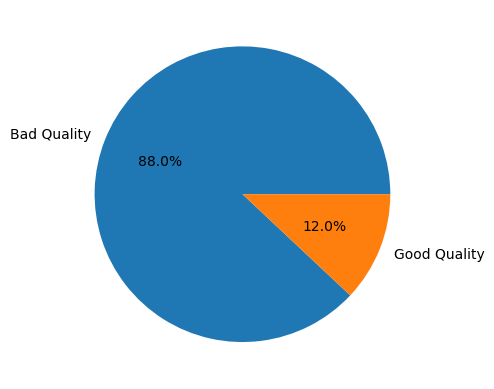

In [48]:
comp=[281.6, 38.4]
labels=('Bad Quality', 'Good Quality')
mp.pie(comp, labels=labels, autopct='%0.1f%%')
mp.show()

In [49]:
#adding the model
from sklearn.tree import DecisionTreeClassifier          

In [50]:
model2 = DecisionTreeClassifier(random_state = 40)

In [51]:
#training the model
model2.fit(X_train, Y_train)                             

DecisionTreeClassifier(random_state=40)

In [52]:
model2.score(X_train, Y_train)

1.0

In [53]:
 #checking the accuracy of the testing part
model2.score(X_test,Y_test)                          

0.896875

In [54]:
pred2 = model2.predict(X_test)

In [55]:
pred2

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
#converting the array into the dataframe
df1 = pd.DataFrame(pred2)                         

In [57]:
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       272
           1       0.67      0.62      0.65        48

    accuracy                           0.90       320
   macro avg       0.80      0.78      0.79       320
weighted avg       0.89      0.90      0.90       320



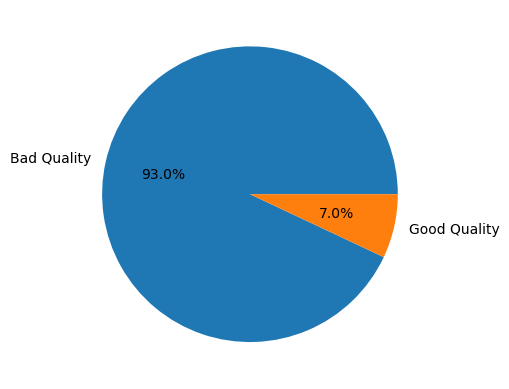

In [58]:
comp=[297.6, 22.4]
labels=('Bad Quality', 'Good Quality')
mp.pie(comp, labels=labels, autopct='%0.1f%%')
mp.show()

In [59]:
  #adding the model
from sklearn.ensemble import RandomForestClassifier        

In [60]:
model3 = RandomForestClassifier(random_state = 40)

In [61]:
#training the model
model3.fit(X_train, Y_train)                                  

RandomForestClassifier(random_state=40)

In [62]:
model3.score(X_train, Y_train)    

1.0

In [63]:
 #checking the accuracy of the testing part
model3.score(X_test,Y_test)                                 

0.909375

In [64]:
pred3 = model3.predict(X_test)

In [65]:
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
#converting the array into the dataframe
df2 = pd.DataFrame(pred3)                               

In [67]:
print(classification_report(Y_test, pred3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       272
           1       0.81      0.52      0.63        48

    accuracy                           0.91       320
   macro avg       0.86      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



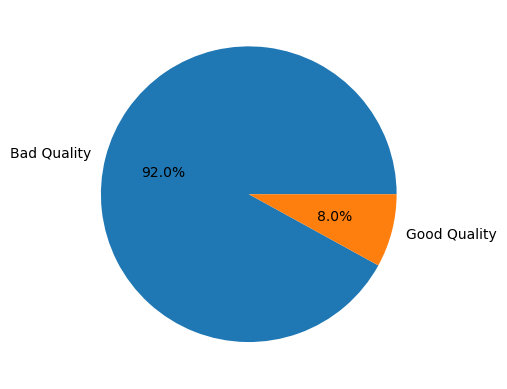

In [68]:
comp=[294.4, 25.6]
labels=('Bad Quality', 'Good Quality')
mp.pie(comp, labels=labels, autopct='%0.1f%%')
mp.show()

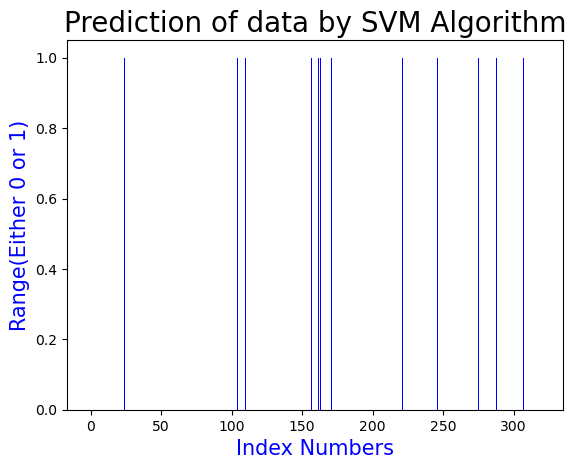

In [69]:
mp.bar(df.index, pred1, color ='b')
mp.xlabel('Index Numbers', fontsize = 15, color = 'b')
mp.ylabel('Range(Either 0 or 1)', fontsize = 15, color = 'b')
mp.title('Prediction of data by SVM Algorithm', fontsize = 20)
mp.show()

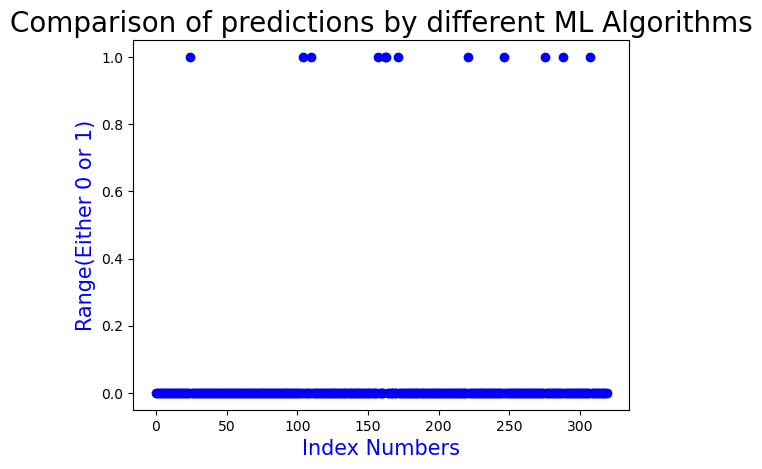

In [70]:
mp.scatter(df.index, pred1, color ='b')
mp.xlabel('Index Numbers', fontsize = 15, color = 'b')
mp.ylabel('Range(Either 0 or 1)', fontsize = 15, color = 'b')
mp.title('Comparison of predictions by different ML Algorithms', fontsize = 20)
mp.show()

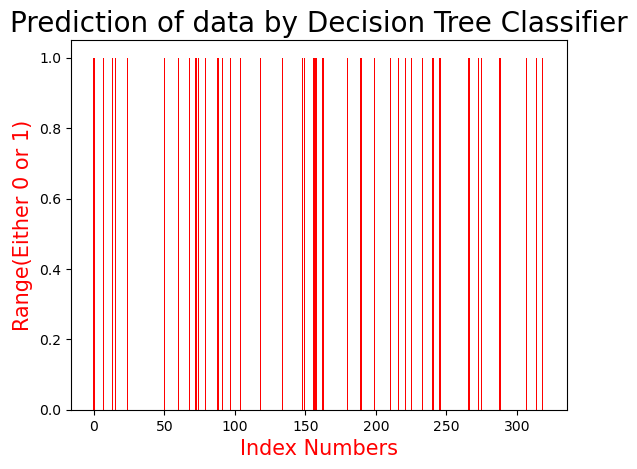

In [71]:
mp.bar(df1.index, pred2, color ='r')
mp.xlabel('Index Numbers', fontsize = 15, color = 'r')
mp.ylabel('Range(Either 0 or 1)', fontsize = 15, color = 'r')
mp.title('Prediction of data by Decision Tree Classifier', fontsize = 20)
mp.show()

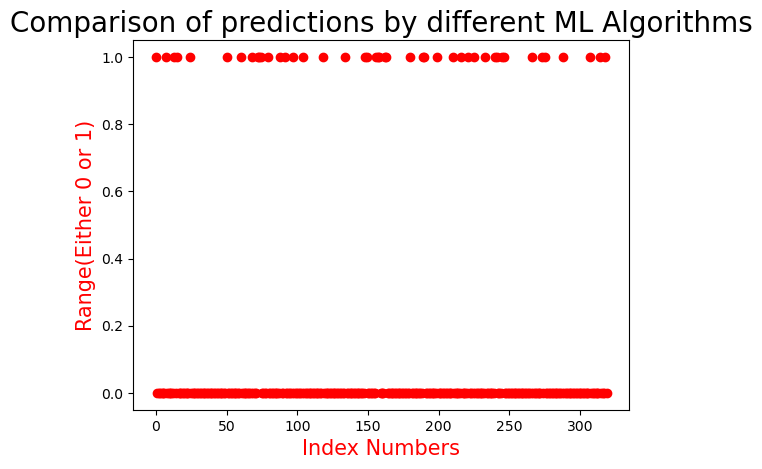

In [72]:
mp.scatter(df1.index, pred2, color ='r')
mp.xlabel('Index Numbers', fontsize = 15, color = 'r')
mp.ylabel('Range(Either 0 or 1)', fontsize = 15, color = 'r')
mp.title('Comparison of predictions by different ML Algorithms', fontsize = 20)
mp.show()

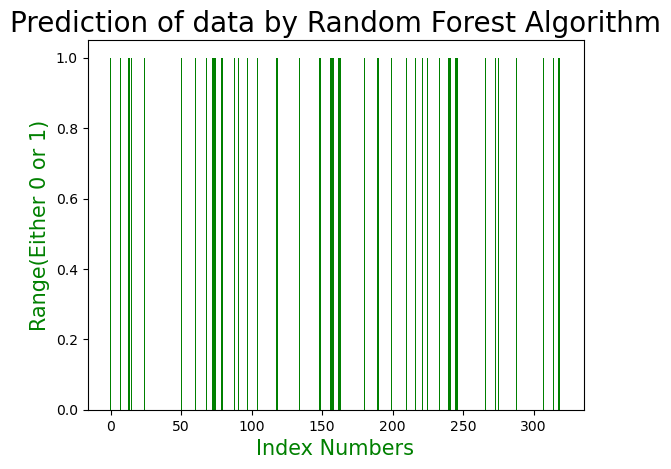

In [73]:
mp.bar(df2.index, pred2, color ='g')
mp.xlabel('Index Numbers', fontsize = 15, color = 'g')
mp.ylabel('Range(Either 0 or 1)', fontsize = 15, color = 'g')
mp.title('Prediction of data by Random Forest Algorithm', fontsize = 20)
mp.show()

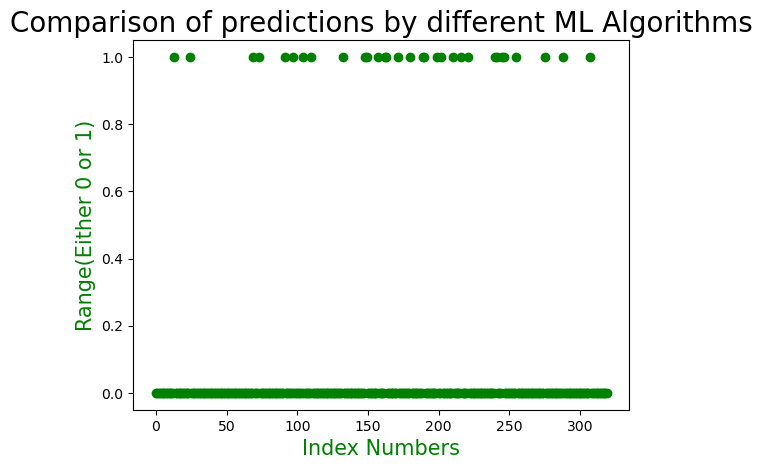

In [74]:
mp.scatter(df2.index, pred3, color ='g')
mp.xlabel('Index Numbers', fontsize = 15, color = 'g')
mp.ylabel('Range(Either 0 or 1)', fontsize = 15, color = 'g')
mp.title('Comparison of predictions by different ML Algorithms', fontsize = 20)
mp.show()

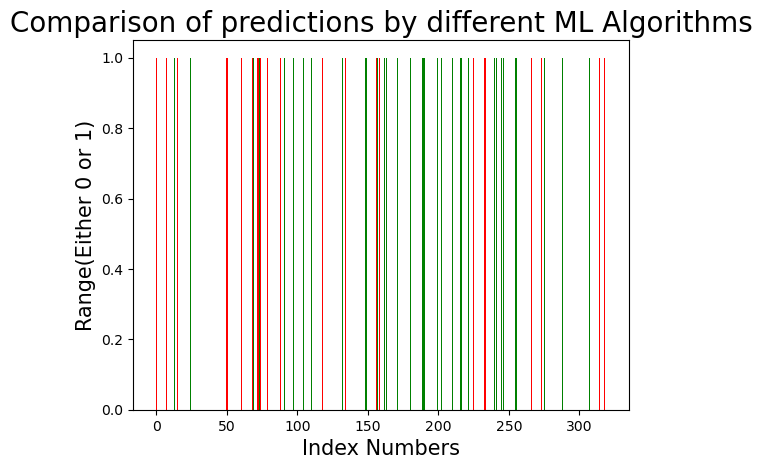

In [75]:
mp.bar(df.index, pred1, color ='y')
mp.bar(df1.index, pred2, color ='r')
mp.bar(df2.index, pred3, color ='g')
mp.xlabel('Index Numbers', fontsize = 15)
mp.ylabel('Range(Either 0 or 1)', fontsize = 15)
mp.title('Comparison of predictions by different ML Algorithms', fontsize = 20)
mp.show()

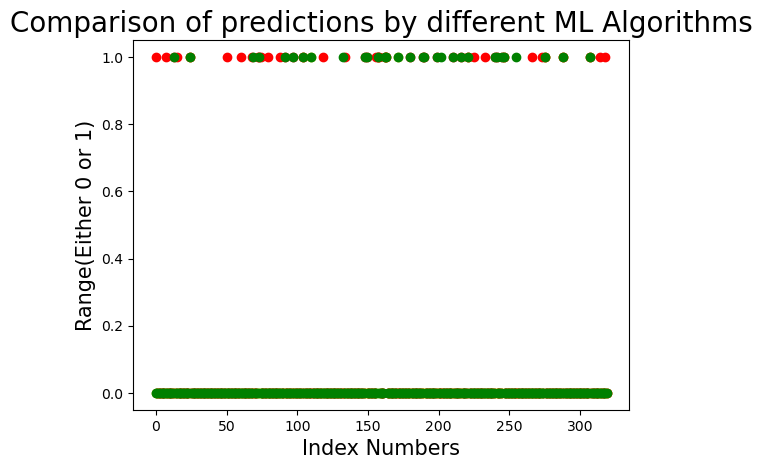

In [76]:
mp.scatter(df.index, pred1, color ='y')
mp.scatter(df1.index, pred2, color ='r')
mp.scatter(df2.index, pred3, color ='g')
mp.xlabel('Index Numbers', fontsize = 15)
mp.ylabel('Range(Either 0 or 1)', fontsize = 15)
mp.title('Comparison of predictions by different ML Algorithms', fontsize = 20)
mp.show()

In [77]:
#creating an empty list to add the accuracy of all the 3 algorithms
acc = []                 

In [78]:
acc.append(model1.score(X_test, Y_test))
acc.append(model2.score(X_test, Y_test))
acc.append(model3.score(X_test, Y_test))

In [79]:
acc_name = ['SVM', 'Decision Tree Classifier', 'Random Forest']

In [80]:
acc

[0.875, 0.896875, 0.909375]

In [81]:
acc_name

['SVM', 'Decision Tree Classifier', 'Random Forest']

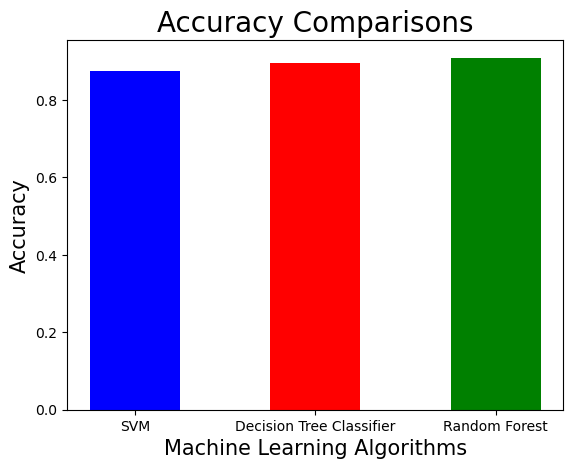

In [82]:
colours = ['b', 'r', 'g']
mp.xlabel('Machine Learning Algorithms', fontsize = 15)
mp.ylabel('Accuracy', fontsize = 15)
mp.title('Accuracy Comparisons', fontsize = 20)
mp.bar(acc_name, acc, color= colours, width= 0.5)
mp.show()

In [83]:
from sklearn.metrics import confusion_matrix

In [87]:
import seaborn as ps

In [88]:
result = confusion_matrix(Y_test, pred1)

In [89]:
print(result)

[[270   2]
 [ 38  10]]


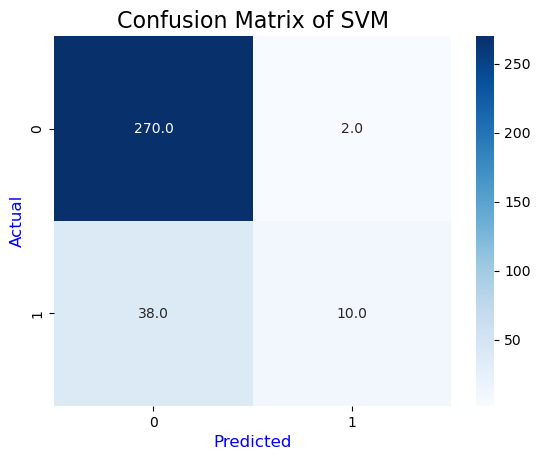

In [90]:
ps.heatmap(result, annot=True, cmap='Blues', fmt="0.1f")
mp.title('Confusion Matrix of SVM', fontsize = 16)
mp.xlabel('Predicted', fontsize = 12, color = 'b')
mp.ylabel('Actual', fontsize = 12, color = 'b')
mp.show()

In [91]:
result1 = confusion_matrix(Y_test, pred2)

In [92]:
print(result1)

[[257  15]
 [ 18  30]]


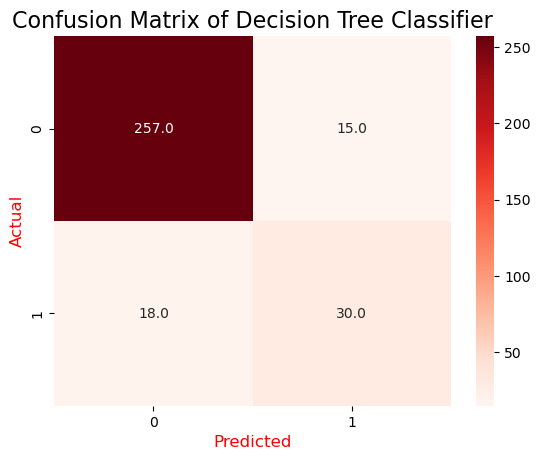

In [93]:
ps.heatmap(result1, annot=True, cmap='Reds', fmt="0.1f")
mp.title('Confusion Matrix of Decision Tree Classifier', fontsize = 16)
mp.xlabel('Predicted', fontsize = 12, color = 'r')
mp.ylabel('Actual', fontsize = 12, color = 'r')
mp.show()

In [94]:
result2 = confusion_matrix(Y_test, pred3)

In [95]:
print(result2)

[[266   6]
 [ 23  25]]


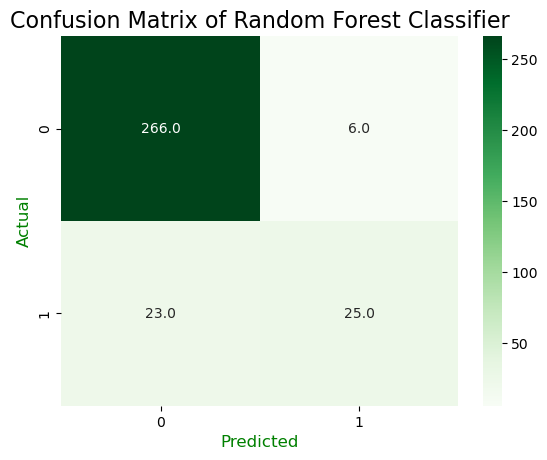

In [96]:
ps.heatmap(result2, annot=True, cmap='Greens', fmt="0.1f")
mp.title('Confusion Matrix of Random Forest Classifier', fontsize = 16)
mp.xlabel('Predicted', fontsize = 12, color = 'g')
mp.ylabel('Actual', fontsize = 12, color = 'g')
mp.show()

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [98]:
probs1 = model2.predict_proba(X_test)

In [99]:
probs1=probs1[:,1]

In [100]:
auc1 = roc_auc_score(Y_test, probs1)

In [101]:
print(auc1)

0.7849264705882353


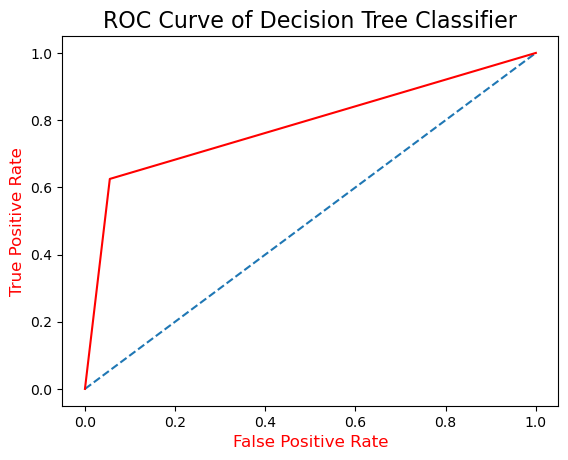

In [102]:
fpr, tpr, thresh = roc_curve(Y_test, probs1)

mp.plot([0,1], [0,1], linestyle= '--')
mp.plot(fpr,tpr, color = 'red')
mp.title('ROC Curve of Decision Tree Classifier', fontsize = 16)
mp.xlabel('False Positive Rate', fontsize = 12, color = 'r')
mp.ylabel('True Positive Rate', fontsize = 12, color = 'r')
mp.show()

In [103]:
probs2 = model3.predict_proba(X_test)

In [104]:
probs2=probs2[:,1]

In [105]:
auc2 = roc_auc_score(Y_test, pred3)

In [106]:
print(auc2)

0.7493872549019608


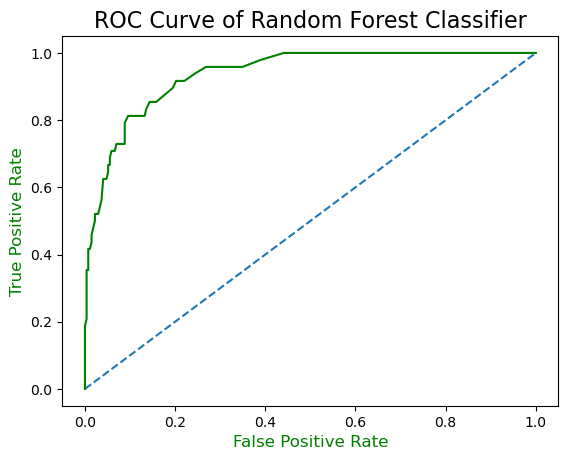

In [107]:
fpr, tpr, thresh = roc_curve(Y_test, probs2)

mp.plot([0,1], [0,1], linestyle= '--')
mp.plot(fpr,tpr, color = 'green')
mp.title('ROC Curve of Random Forest Classifier', fontsize = 16)
mp.xlabel('False Positive Rate', fontsize = 12, color = 'g')
mp.ylabel('True Positive Rate', fontsize = 12, color = 'g')
mp.show()

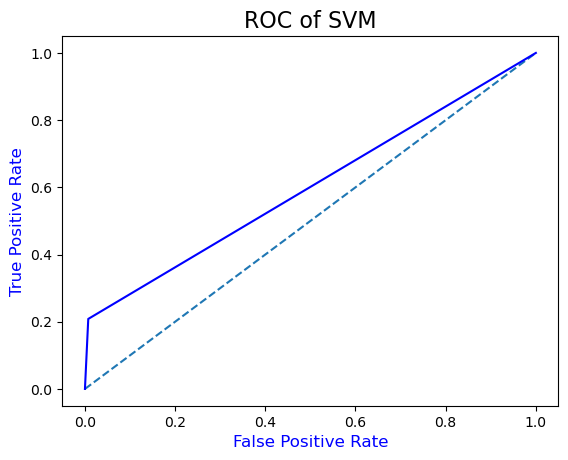

In [108]:
fpr, tpr, thresh = roc_curve(Y_test, pred1)

mp.plot([0,1], [0,1], linestyle= '--')
mp.plot(fpr,tpr, color = 'blue')
mp.title('ROC of SVM', fontsize = 16)
mp.xlabel('False Positive Rate', fontsize = 12, color = 'b')
mp.ylabel('True Positive Rate', fontsize = 12, color = 'b')
mp.show()